# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import plot_tree, DecisionTreeClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix

from sklearn.model_selection import train_test_split, cross_val_predict

%matplotlib inline

In [4]:
df = pd.read_csv('mod07_df_encoded_index.csv', sep=',')
df = df.drop(['Unnamed: 0'], axis=1)
df.head()

,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau,sexo_M,...,educacao_Secondary / secondary special,estado_civil_Married,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
0,0,58.832877,3.106849,1,0,0,0,2.0,0,1,...,1,1,0,0,0,1,0,0,0,0
1,0,52.356164,8.358904,1,0,1,1,1.0,0,0,...,1,0,0,1,0,1,0,0,0,0
2,0,52.356164,8.358904,1,0,1,1,1.0,0,0,...,1,0,0,1,0,1,0,0,0,0
3,0,46.224658,2.106849,1,1,1,1,2.0,0,1,...,0,1,0,0,0,1,0,0,0,0
4,0,29.230137,3.021918,1,0,0,0,2.0,0,0,...,0,1,0,0,0,1,0,0,0,0


In [6]:
y = df.mau
y 

0        0
1        0
2        0
3        0
4        0
        ..
16645    1
16646    1
16647    1
16648    1
16649    1
Name: mau, Length: 16650, dtype: int64

In [8]:
x = df.drop ('mau', axis=1)
x

,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,sexo_M,posse_de_veiculo_Y,...,educacao_Secondary / secondary special,estado_civil_Married,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
0,0,58.832877,3.106849,1,0,0,0,2.0,1,1,...,1,1,0,0,0,1,0,0,0,0
1,0,52.356164,8.358904,1,0,1,1,1.0,0,0,...,1,0,0,1,0,1,0,0,0,0
2,0,52.356164,8.358904,1,0,1,1,1.0,0,0,...,1,0,0,1,0,1,0,0,0,0
3,0,46.224658,2.106849,1,1,1,1,2.0,1,1,...,0,1,0,0,0,1,0,0,0,0
4,0,29.230137,3.021918,1,0,0,0,2.0,0,1,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16645,0,54.109589,9.884932,1,0,0,0,2.0,0,0,...,1,0,0,0,0,1,0,0,0,0
16646,0,43.389041,7.380822,1,1,1,0,2.0,0,0,...,1,1,0,0,0,1,0,0,0,0
16647,0,30.005479,9.800000,1,1,0,0,2.0,1,1,...,1,1,0,0,0,1,0,0,0,0
16648,0,30.005479,9.800000,1,1,0,0,2.0,1,1,...,1,1,0,0,0,1,0,0,0,0


In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=100)

### 2) Vamos para o modelo:
1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento
6. Defina um objeto com a função da árvore de decisão vista em aula.

In [12]:
#1 
clf = DecisionTreeClassifier(random_state=100)

In [14]:
#2
clf = clf.fit(x_train, y_train)

In [15]:
y_chapeu_train_predict = clf.predict(x_train)
y_chapeu_train_predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

[Text(0.6247442248018321, 0.9814814814814815, 'tempo_emprego <= 2.848\ngini = 0.044\nsamples = 11655\nvalue = [11392, 263]\nclass = Aprovados'),
 Text(0.3727426146881527, 0.9444444444444444, 'tempo_emprego <= 2.845\ngini = 0.059\nsamples = 4279\nvalue = [4149, 130]\nclass = Aprovados'),
 Text(0.232954376898614, 0.9074074074074074, 'idade <= 30.175\ngini = 0.058\nsamples = 4273\nvalue = [4145, 128]\nclass = Aprovados'),
 Text(0.05999620277197646, 0.8703703703703703, 'educacao_Incomplete higher <= 0.5\ngini = 0.116\nsamples = 438\nvalue = [411, 27]\nclass = Aprovados'),
 Text(0.04404784507309664, 0.8333333333333334, 'idade <= 30.137\ngini = 0.084\nsamples = 388\nvalue = [371, 17]\nclass = Aprovados'),
 Text(0.03037782418834251, 0.7962962962962963, 'estado_civil_Single / not married <= 0.5\ngini = 0.071\nsamples = 381\nvalue = [367, 14]\nclass = Aprovados'),
 Text(0.012151129675337003, 0.7592592592592593, 'tempo_emprego <= 0.693\ngini = 0.042\nsamples = 283\nvalue = [277, 6]\nclass = Apro

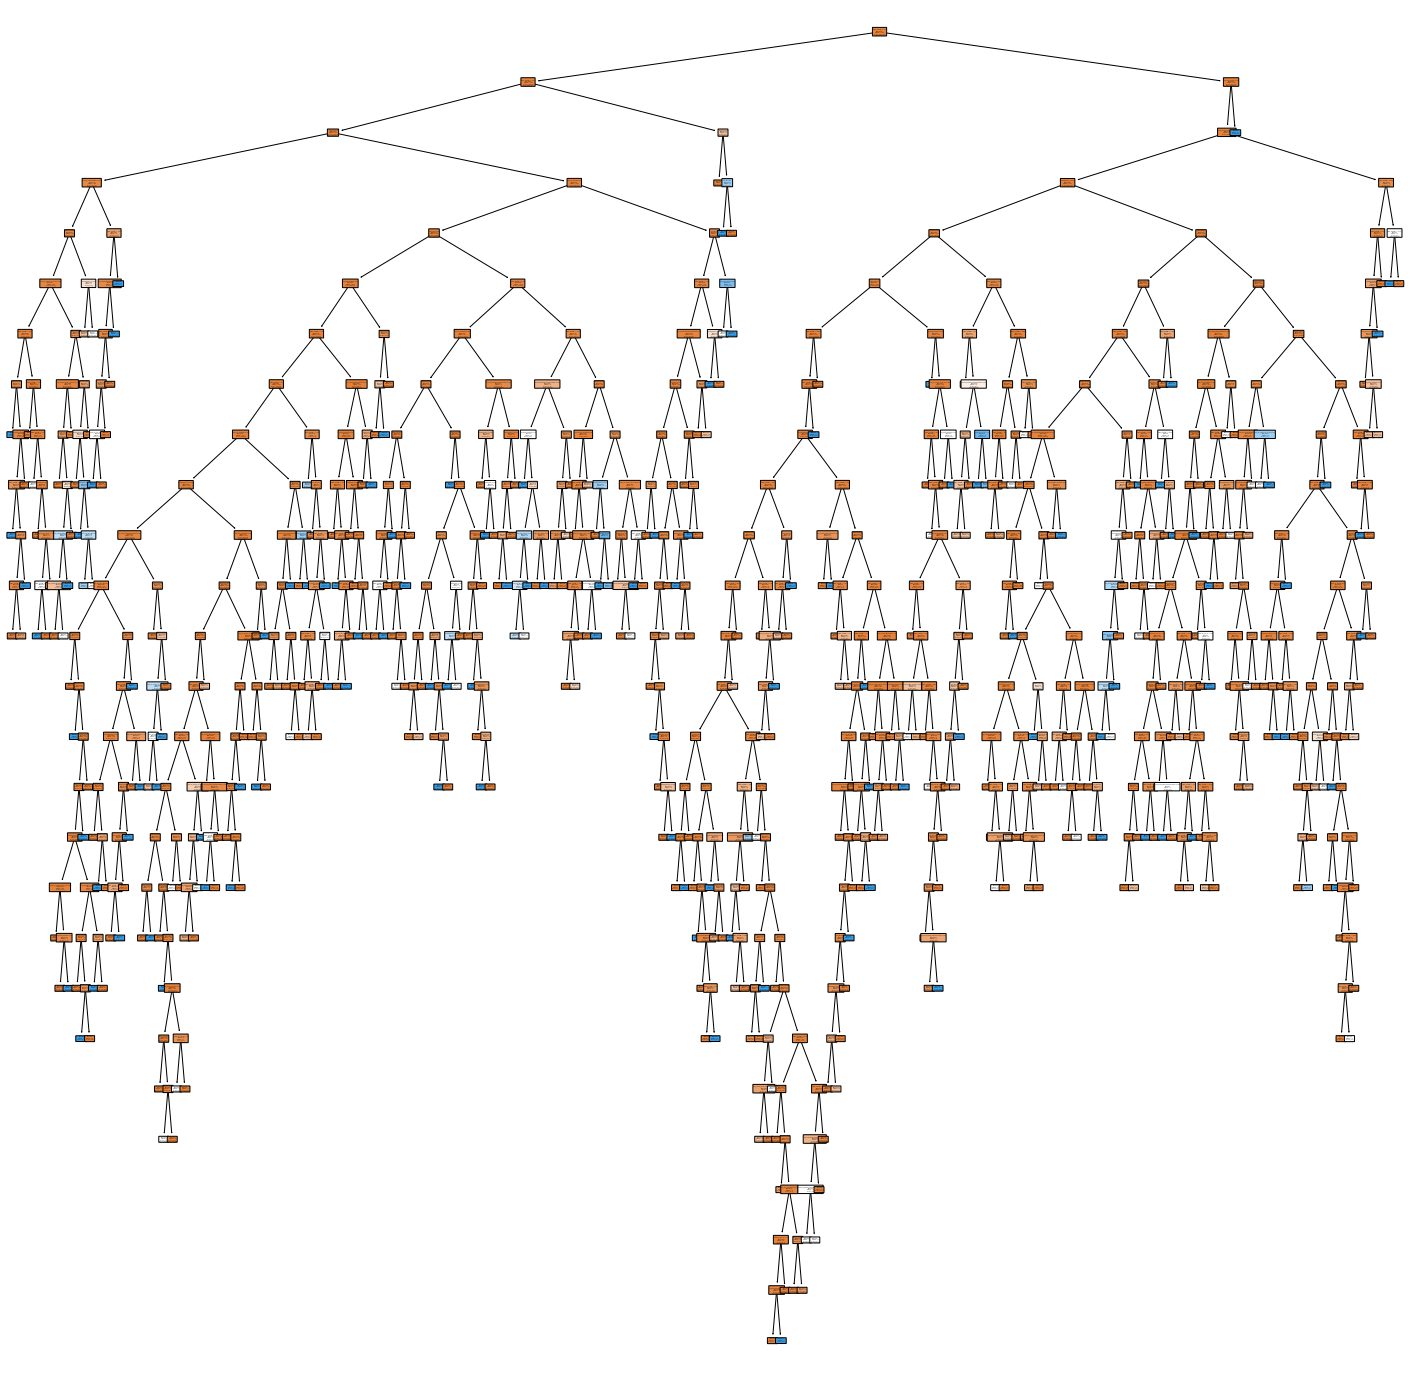

In [16]:
#3
plt.figure(figsize=[25, 25])
plot_tree(clf,
          filled=True,
          rounded=True,
          class_names=['Aprovados', 'Reprovados'],
          feature_names=x_train.columns)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


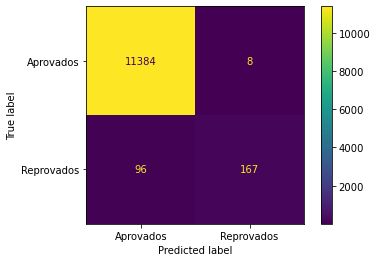

In [18]:
#4
plot_confusion_matrix(clf, x_train, y_train, display_labels=['Aprovados', 'Reprovados'])

In [19]:
#5
accuracy_treino = 4313+215+196+15
(4313+15)/accuracy_treino

0.9132728423718084

In [20]:
accuracy_score(y_train, y_chapeu_train_predict)

0.991076791076791

#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

In [22]:
#1
y_chapeu_test_predict = clf.predict(x_test)
y_chapeu_test_predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


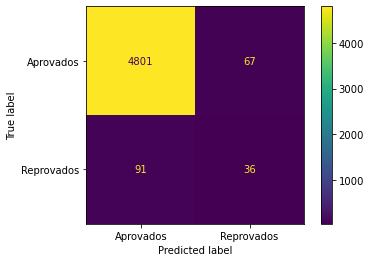

In [23]:
#2
plot_confusion_matrix(clf, x_test, y_test, display_labels=['Aprovados', 'Reprovados'])

In [24]:
#3
print(accuracy_score(y_test, y_chapeu_test_predict))

0.9683683683683684


In [25]:
#3.1
print(accuracy_score(y_train, y_chapeu_train_predict))

0.991076791076791


In [28]:
#4
clf_2 = DecisionTreeClassifier(min_samples_leaf=5, max_depth=10, random_state=123)
clf_2 = clf_2.fit(x_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


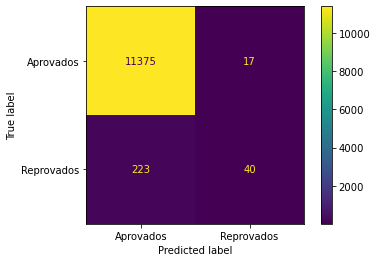

In [30]:
plot_confusion_matrix(clf_2, x_train, y_train, display_labels=['Aprovados', 'Reprovados'])

In [31]:
print((4517+16)/4739)

0.9565309136948723


[Text(0.5458579881656804, 0.9545454545454546, 'tempo_emprego <= 2.848\ngini = 0.044\nsamples = 11655\nvalue = [11392, 263]\nclass = Aprovados'),
 Text(0.2515717455621302, 0.8636363636363636, 'tempo_emprego <= 2.845\ngini = 0.059\nsamples = 4279\nvalue = [4149, 130]\nclass = Aprovados'),
 Text(0.24565458579881658, 0.7727272727272727, 'idade <= 30.175\ngini = 0.058\nsamples = 4273\nvalue = [4145, 128]\nclass = Aprovados'),
 Text(0.10281065088757396, 0.6818181818181818, 'educacao_Incomplete higher <= 0.5\ngini = 0.116\nsamples = 438\nvalue = [411, 27]\nclass = Aprovados'),
 Text(0.0695266272189349, 0.5909090909090909, 'idade <= 30.137\ngini = 0.084\nsamples = 388\nvalue = [371, 17]\nclass = Aprovados'),
 Text(0.06360946745562131, 0.5, 'estado_civil_Single / not married <= 0.5\ngini = 0.071\nsamples = 381\nvalue = [367, 14]\nclass = Aprovados'),
 Text(0.03254437869822485, 0.4090909090909091, 'tempo_emprego <= 0.693\ngini = 0.042\nsamples = 283\nvalue = [277, 6]\nclass = Aprovados'),
 Text(

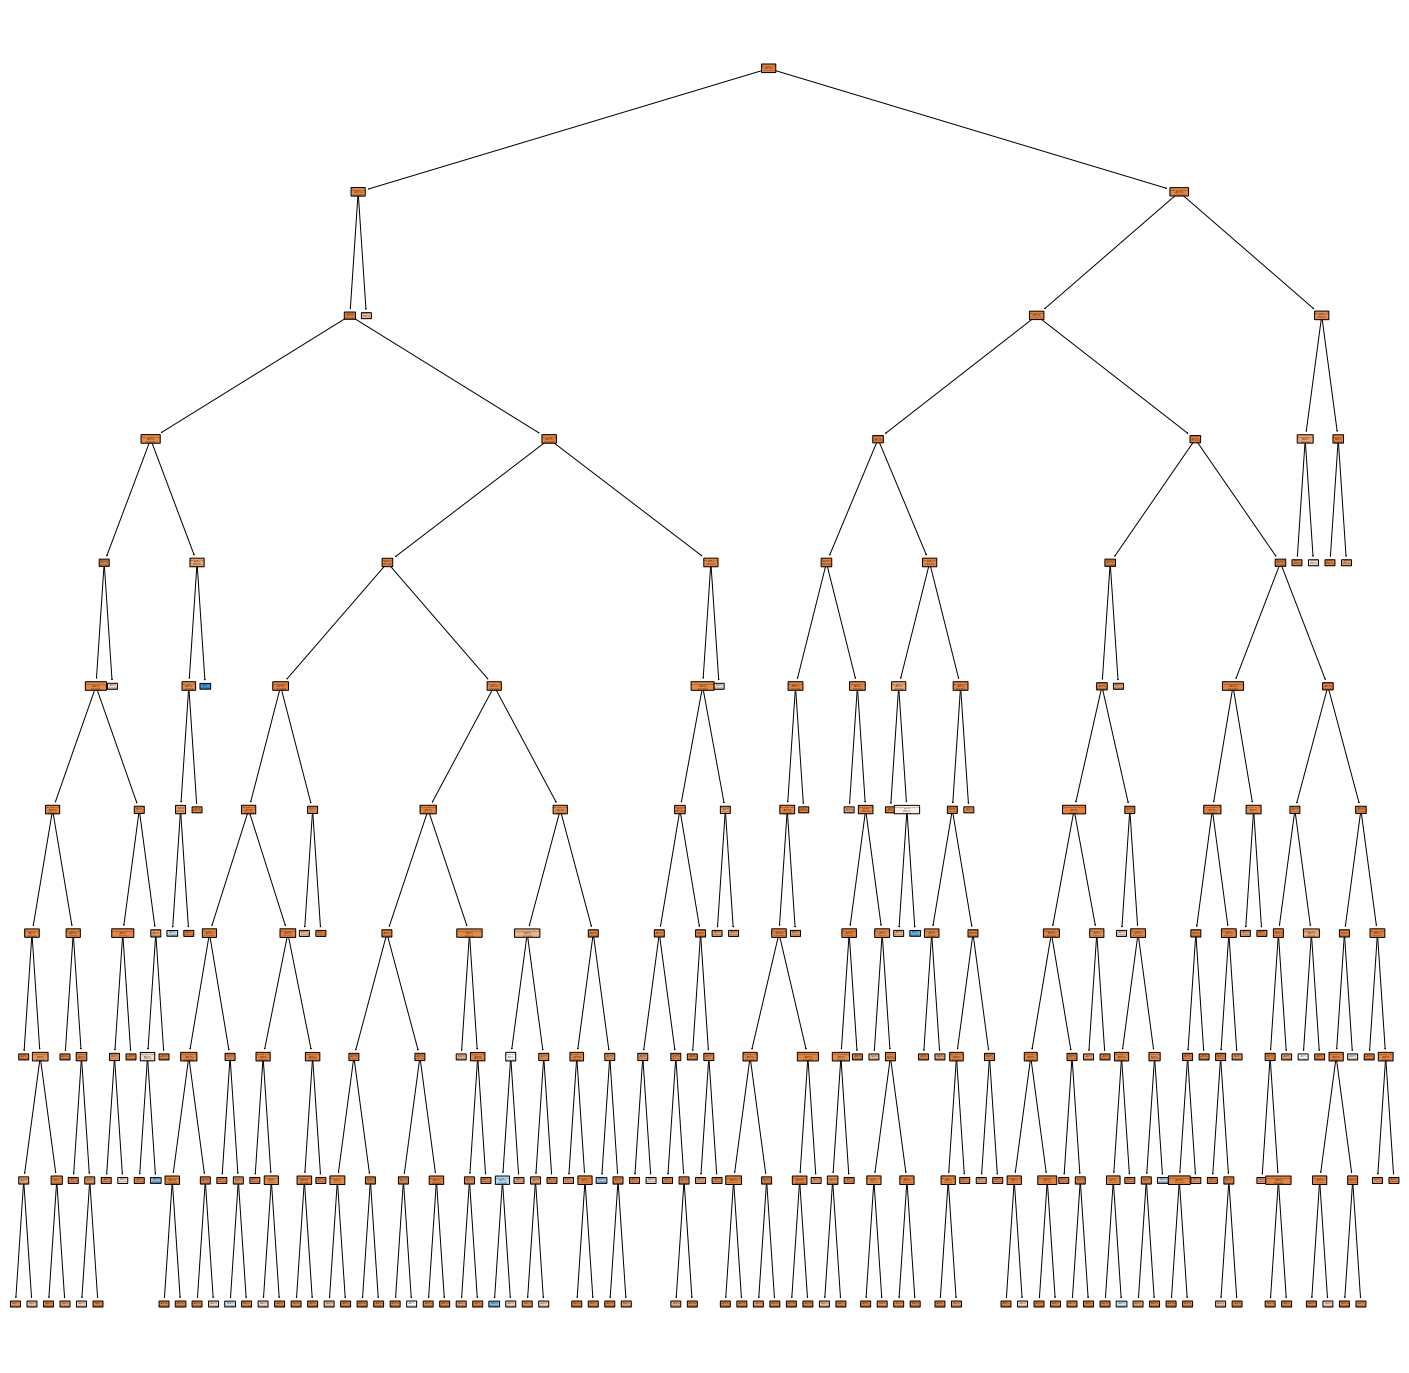

In [33]:
plt.figure(figsize=[25,25])
plot_tree(clf_2,
         filled=True,
         rounded=True,
         class_names=['Aprovados', 'Reprovados'],
         feature_names=x_train.columns)

In [34]:
#5
print(f'A acurácia ficaria: {4517/4739}')

A acurácia ficaria: 0.9531546739818527
